In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [60]:
breastCancerData = load_breast_cancer()
rows = breastCancerData.data
columns = breastCancerData.feature_names
print(columns)
dataFrame = pd.DataFrame(rows, columns=columns)

dataFrame['diagnosis'] = breastCancerData.target
dataFrame.shape

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


(569, 31)

In [96]:
dataFrame['diagnosis'] = dataFrame['diagnosis'].map({0: 'Malignant',
                                                     1: 'Benign'
                                                    })


<Axes: title={'center': 'The Box Plot of Mean Radius of the Tumor vs Diagnosis'}, xlabel='Diagnosis', ylabel='Mean Radius of the Tumor '>

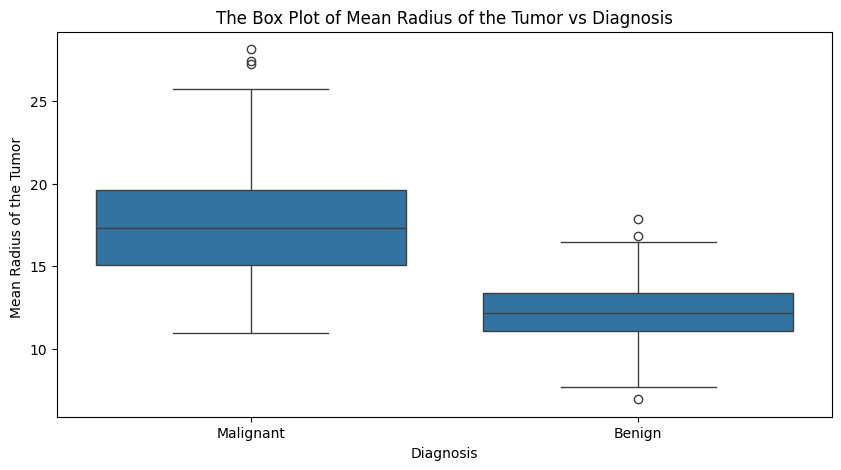

In [24]:
plt.figure(figsize=(10, 5))
plt.title('The Box Plot of Mean Radius of the Tumor vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius of the Tumor ')

# dataFrame['mean radius-Binned'] = pd.cut(dataFrame['mean radius'], bins = 3)
sns.boxplot(data=dataFrame, x='diagnosis', y='mean radius')

<Axes: title={'center': 'The Box Plot of Area of the Tumor vs Diagnosis'}, xlabel='Diagnosis', ylabel='Area of the Tumor'>

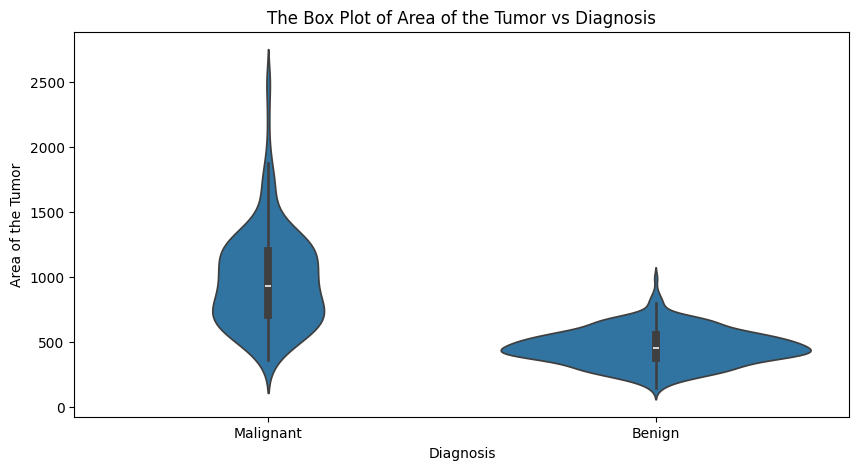

In [25]:
plt.figure(figsize=(10, 5))
plt.title('The Box Plot of Area of the Tumor vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Area of the Tumor')

sns.violinplot(data=dataFrame, x='diagnosis', y='mean area')

(array([ 68., 182., 133.,  87.,  48.,  26.,  15.,   5.,   4.,   1.]),
 array([0.01938 , 0.051982, 0.084584, 0.117186, 0.149788, 0.18239 ,
        0.214992, 0.247594, 0.280196, 0.312798, 0.3454  ]),
 <BarContainer object of 10 artists>)

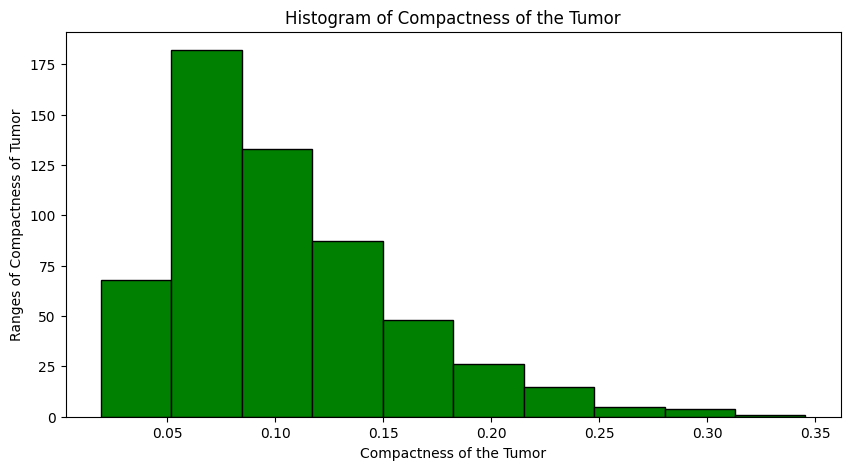

In [28]:
plt.figure(figsize=(10, 5))
plt.title('Histogram of Compactness of the Tumor')
plt.xlabel('Compactness of the Tumor')
plt.ylabel('Ranges of Compactness of Tumor')

plt.hist(data=dataFrame, x='mean compactness', bins=10, edgecolor='black', color='green')

([<matplotlib.patches.Wedge at 0x285be9d47d0>,
 [Text(0.4286547905679233, 1.0130424820920245, 'Malignant Cases'),
  Text(-0.42865446047676137, -1.0130426217654303, 'Benign Cases')],
 [Text(0.23381170394613998, 0.5525686265956496, '37.3%'),
  Text(-0.23381152389641527, -0.5525687027811438, '62.7%')])

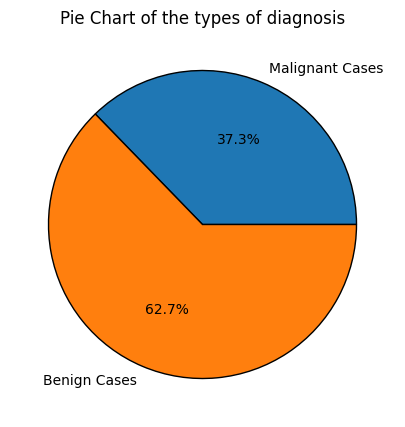

In [42]:
plt.figure(figsize=(10, 5))
plt.title('Pie Chart of the types of diagnosis')
mCount = 0
bCount = 0

for i in dataFrame['diagnosis']:
    if(i == 'Malignant'):
        mCount += 1
    
    else:
        bCount += 1

pieChart = []
labels = ['Malignant Cases', 'Benign Cases']
pieChart.append(mCount)
pieChart.append(bCount)

plt.pie(pieChart, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})

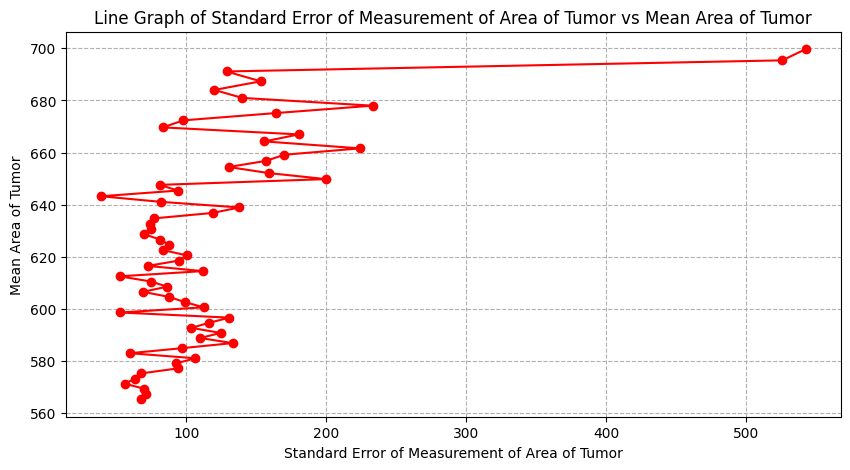

In [75]:
plt.figure(figsize=(10, 5))
plt.title('Line Graph of Standard Error of Measurement of Area of Tumor vs Mean Area of Tumor')
plt.xlabel('Standard Error of Measurement of Area of Tumor')
plt.ylabel('Mean Area of Tumor')

sortedDataFrame = dataFrame.sort_values(by='mean area')

x = sortedDataFrame['area error']
y = sortedDataFrame['mean area']
y_smooth = y.rolling(window=510).mean()

plt.plot(x, y_smooth, marker='o', linestyle='-', color='red')
plt.grid(True, linestyle='--')

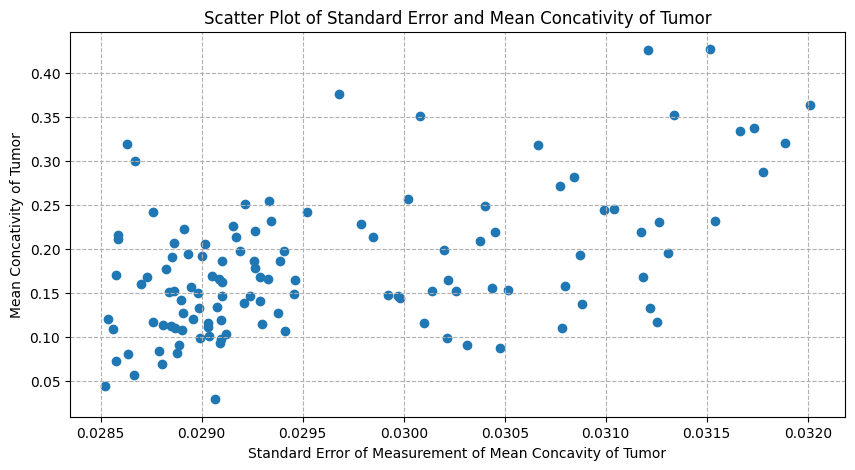

In [101]:
plt.figure(figsize=(10, 5))
plt.title('Scatter Plot of Standard Error and Mean Concativity of Tumor')
plt.xlabel('Standard Error of Measurement of Mean Concavity of Tumor')
plt.ylabel('Mean Concativity of Tumor')

x = sortedDataFrame['concavity error']
y = sortedDataFrame['mean concavity']
x_smooth = x.rolling(window=450).mean()
plt.scatter(x_smooth, y)
plt.grid(True, linestyle='--')

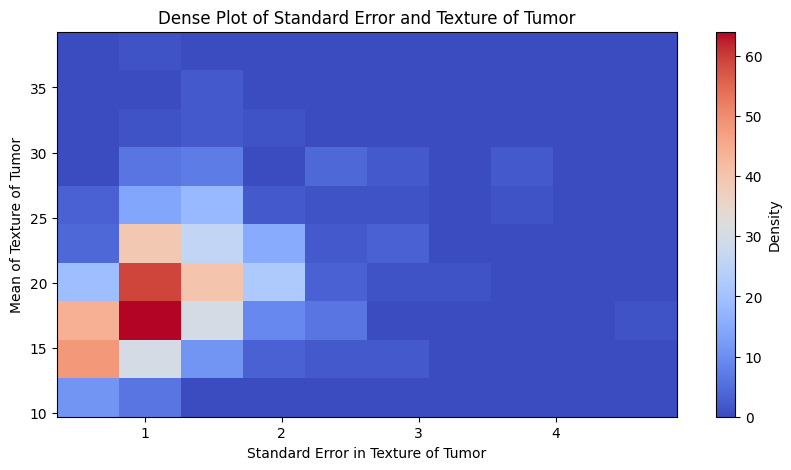

In [90]:
plt.figure(figsize=(10, 5))
plt.title('Dense Plot of Standard Error and Texture of Tumor')
plt.xlabel('Standard Error in Texture of Tumor')
plt.ylabel('Mean of Texture of Tumor')

x = dataFrame['texture error']
y = dataFrame['mean texture']

plt.hist2d(x, y, cmap='coolwarm')
plt.colorbar(label='Density')

<Axes: title={'center': 'Correlation Heatmap of Breast Cancer Dataset'}>

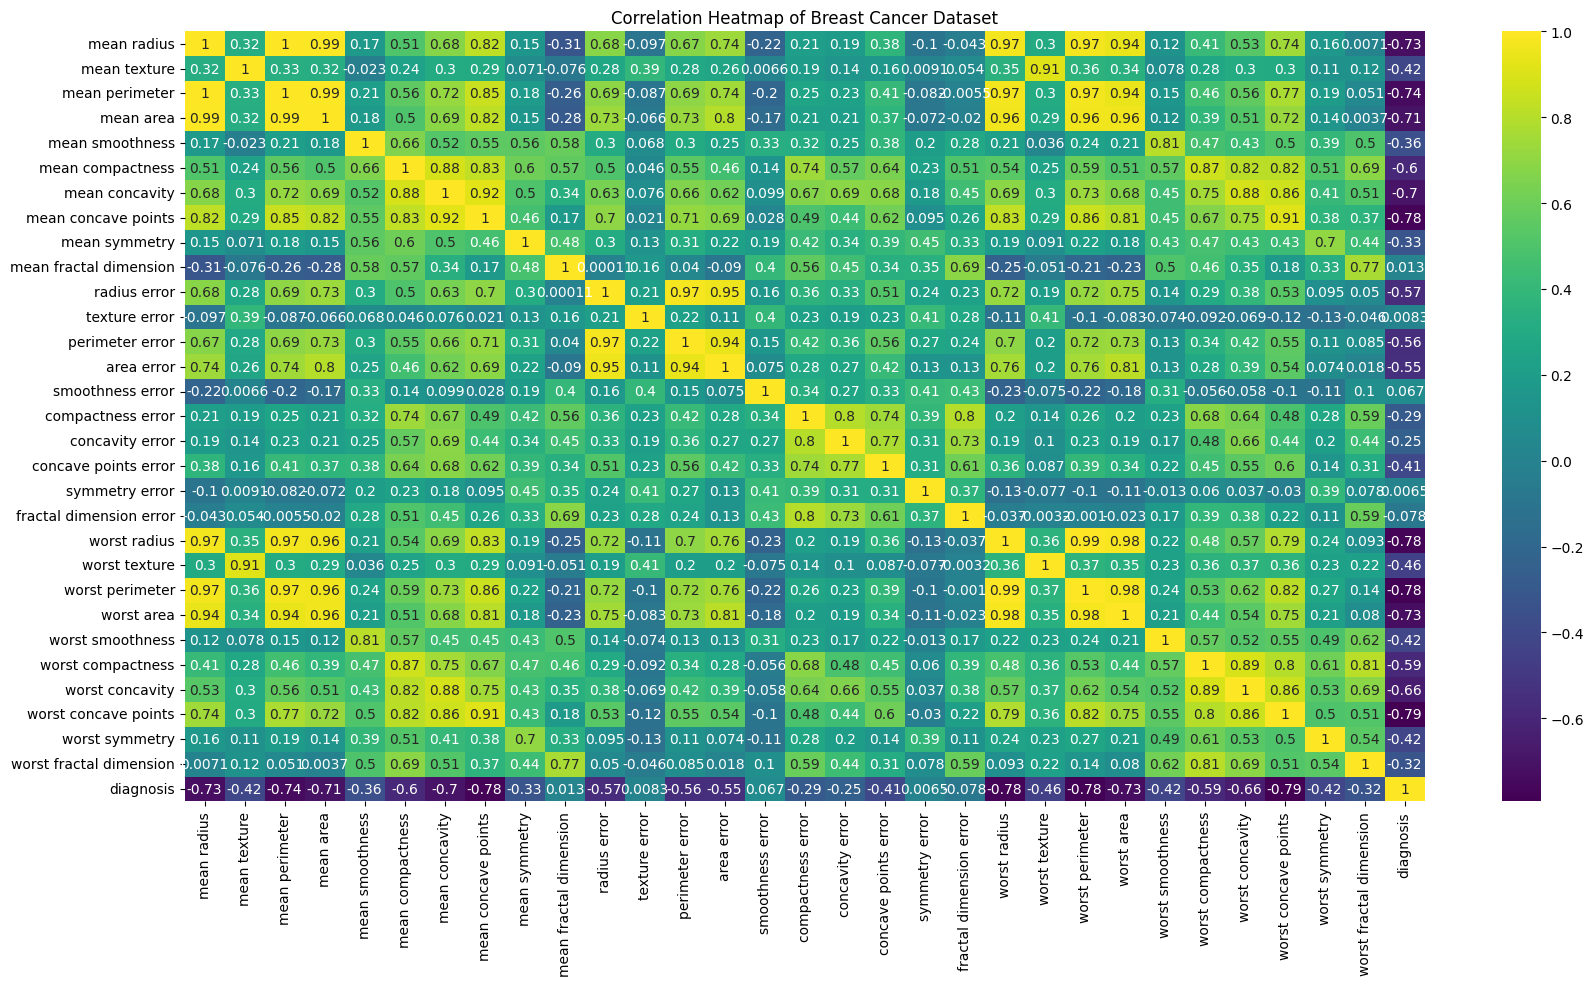

In [93]:
plt.figure(figsize=(20, 10))
plt.title('Correlation Heatmap of Breast Cancer Dataset')

dataFrame = dataFrame.select_dtypes(include='number')
dataFrame = pd.get_dummies(dataFrame, drop_first=True)

correlationMatrix = dataFrame.corr()
sns.heatmap(correlationMatrix, annot = True, cmap = 'viridis')

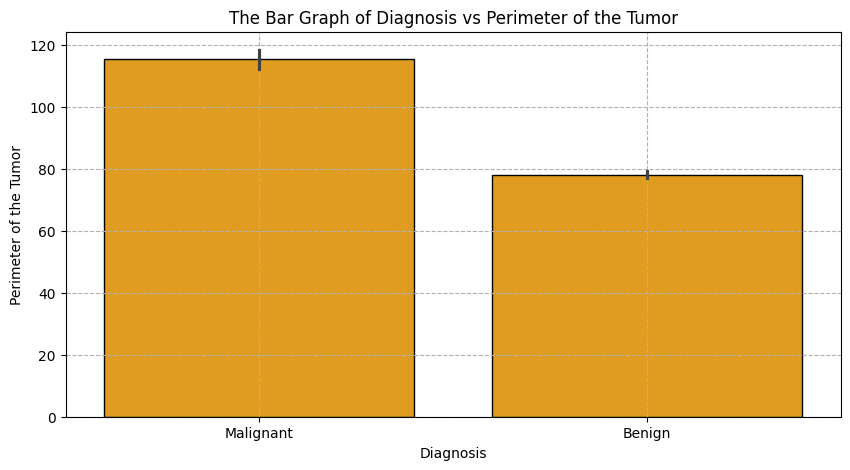

In [100]:
plt.figure(figsize=(10,5))
plt.title('The Bar Graph of Diagnosis vs Perimeter of the Tumor')
plt.xlabel('Diagnosis')
plt.ylabel('Perimeter of the Tumor')

sns.barplot(data=dataFrame, x='diagnosis', y='mean perimeter', color='orange', edgecolor='black')
plt.grid(True, linestyle='--')